In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Regression
==========
In regression we try to predict a continuous output variable. This can be most easily visualized in one dimension.
We will start with a very simple toy example. We will create a dataset out of a sinus curve with some noise:

In [2]:
x = np.linspace(-3, 3, 100)
print(x)

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

In [3]:
y = np.sin(4 * x) + x + np.random.uniform(size=len(x))

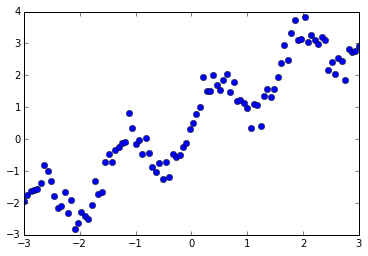

In [4]:
plt.plot(x, y, 'o')

Linear Regression
=================
One of the simplest models again is a linear one, that simply tries to predict the data as lying on a line. One way to find such a line is LinearRegression (also known as ordinary least squares).
The interface for LinearRegression is exactly the same as for the classifiers before, only that ``y`` now contains float values, instead of classes.

To apply a scikit-learn model, we need to make X be a 2d-array:

In [5]:
print(x.shape)
X = x[:, np.newaxis]
print(X.shape)

(100,)
(100, 1)


We split our data in a training and a test set again:

In [6]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

Then we can built our regression model:

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

And predict. First let us try the training set:

In [8]:
y_pred_train = regressor.predict(X_train)

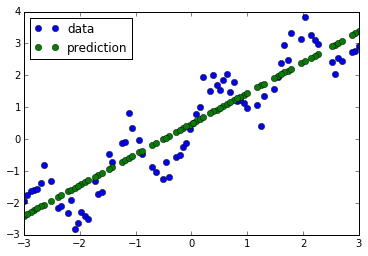

In [9]:
plt.plot(X_train, y_train, 'o', label="data")
plt.plot(X_train, y_pred_train, 'o', label="prediction")
plt.legend(loc='best')

The line is able to capture the general slope of the data, but not many details.

Let's try the test set:

In [10]:
y_pred_test = regressor.predict(X_test)

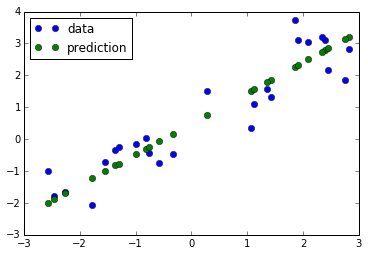

In [11]:
plt.plot(X_test, y_test, 'o', label="data")
plt.plot(X_test, y_pred_test, 'o', label="prediction")
plt.legend(loc='best')

Again, scikit-learn provides an easy way to evaluate the prediction quantitatively using the ``score`` method. For regression tasks, this is the R2 score. Another popular way would be the mean squared error.

In [12]:
regressor.score(X_test, y_test)

0.84468401787399416

KNeighborsRegression
=======================
As for classification, we can also use a neighbor based method for regression. We can simply take the output of the nearest point, or we could average several nearest points. This method is less popular for regression than for classification, but still a good baseline.

In [19]:
from sklearn.neighbors import KNeighborsRegressor
kneighbor_regression = KNeighborsRegressor(n_neighbors=3)
kneighbor_regression.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_neighbors=3, p=2, weights='uniform')

Again, let us look at the behavior on training and test set:

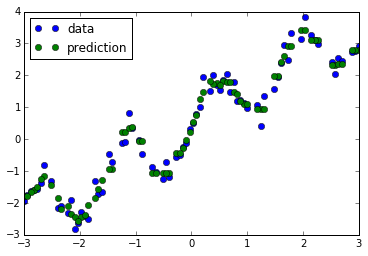

In [20]:
y_pred_train = kneighbor_regression.predict(X_train)

plt.plot(X_train, y_train, 'o', label="data")
plt.plot(X_train, y_pred_train, 'o', label="prediction")
plt.legend(loc='best')

On the training set, we do a perfect job: each point is its own nearest neighbor!

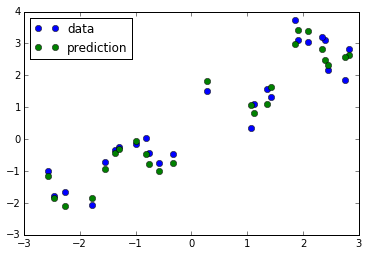

In [21]:
y_pred_test = kneighbor_regression.predict(X_test)

plt.plot(X_test, y_test, 'o', label="data")
plt.plot(X_test, y_pred_test, 'o', label="prediction")
plt.legend(loc='best')

On the test set, we also do a better job of capturing the variation, but our estimates look much more messy then before.
Let us look at the R2 score:

In [22]:
kneighbor_regression.score(X_test, y_test)

0.94896232549612614

Much better then before! Here, the linear model was not a good fit for our problem.

Exercise
=========
Compare the KNeighborsRegressor and LinearRegression on the boston housing dataset. You can load the dataset using ``sklearn.datasets.load_boston``.

In [73]:
from sklearn.datasets import load_boston
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)


In [74]:
# Linear regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print('train score: ', regressor.score(X_train, y_train))
print('test score:  ', regressor.score(X_test, y_test))

('train score: ', 0.76974483705639385)
('test score:  ', 0.63536207866746142)


In [75]:
# KNN
kn_regressor = KNeighborsRegressor(n_neighbors=5)
kn_regressor.fit(X_train, y_train)
print('train score: ', kn_regressor.score(X_train, y_train))
print('test score:  ', kn_regressor.score(X_test, y_test))

('train score: ', 0.7061990439169894)
('test score:  ', 0.46163809246101117)
